# **Detekcija lica**

## **Sadržaj**


1.   Uvod
2.   Face detection
3.   Detekcija lica pomoću HOG karakteristika
4.   Face recognition
5.   OpenCV
6.   Detekcija lica pomoću HaarCascade
7.   Detekcija lica pomoću MediaPipe
8.   Detekcija lica pomoću MTCNN-a
9.   Zaključak
10.  Literatura



## **Uvod**


Cilj ovog istraživanja je istražiti primenu tehnika mašinskog učenja i dubokog učenja u kontekstu obrade slika, posebno u detekciji lica. Rad se sastoji iz nekoliko delova koji se bave algoritmima za obradu slika.

U prvom delu rada detaljno je razmatrana detekcija lica primenom HOG karakteristika. Zatim je obrađeno prepoznavanje lica na slikama koje sadrže više lica, a korišćene su različite tehnike kao što su HaarCascade, MediaPipe i MTCNN biblioteke.

Za potrebe ovog istraživanja korišćen je dataset koji sadrži pet foldera, pri čemu svaki folder sadrži oko 50 kropovanih fotografija lica glumaca iz serije Avengers. Glumci koji se nalaze u dataset-u uključuju:


1.   Chris Evans
2.   Chris Hemsworth
3.   Mark Ruffalo
4.   Robert Downey Jr.
5.   Scarlett Johansson

Link do *dataset*-a je: https://drive.google.com/file/d/1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw/view





## **Face detection**

Detekcija lica je tehnologija u oblasti veštačke inteligencije koja se koristi za pronalaženje i identifikaciju ljudskih lica na digitalnim slikama. Ova tehnologija ima široku primenu u različitim oblastima, uključujući bezbednost, biometriju, sprovođenje zakona, zabavu i ličnu bezbednost, omogućavajući nadzor i praćenje ljudi u stvarnom vremenu. Detekcija lica je evoluirala od ranijih tehnika kompjuterske vizije do naprednih metoda mašinskog učenja i dubokog učenja, što je rezultiralo kontinuiranim poboljšanjem tačnosti i performansi.

Algoritmi za detekciju lica fokusiraju se na prepoznavanje frontalnih ljudskih lica na slici. Ova detekcija je analogna tome da se slika postepeno upoređuje sa slikom lica. Međutim, detekcija lica je izazovna zbog mnogih promenljivih, kao što su položaj, izraz, orijentacija, boja kože, prisustvo naočara, osvetljenje i rezolucija slike. Osnovni cilj algoritma za detekciju lica je da utvrdi postoji li lice na slici ili ne.

Važno je napomenuti da postoji razlika između detekcije lica (face detection) i prepoznavanja lica (face recognition). Detekcija lica identifikuje broj lica na slici i može da pruži neke demografske informacije kao što su starost ili pol, ali ne prepoznaje pojedinačne osobe. Prepoznavanje lica, s druge strane, identifikuje konkretne osobe na slici ili videu u odnosu na prethodno definisanu bazu podataka lica.

Proces detekcije lica obuhvata analizu slike ili videa kako bi se razlikovala lica od drugih objekata u pozadini. To uključuje kompenzaciju za osvetljenje, orijentaciju i udaljenost kamere. Postoje različite metode koje računar može koristiti kako bi postigao ovu detekciju, a one se mogu svrstati u četiri glavne kategorije:

1.   Detekcija lica zasnovana na znanju
2.   Detekcija lica u skladu sa šablonom
3.   Detekcija lica zasnovano na karakteristikama
4.   Detekcija lica zasnovano na izgledu

Algoritmi za detekciju lica često pripadaju više od jedne od ovih kategorija.






Učitavanje *dataset*-a potrebnog za izradu zadatka.

Dekomprimovanje zip-ovanog foldera  *dataset*-a

In [1]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [2]:
# Uvoz gdown modula
import gdown

In [3]:
# preuzimanje datoteke sa Google Drive-a
!gdown --fuzzy https://drive.google.com/file/d/1poBLVBGNteXhgMVDO2vo9XxpXDsTeUK6/view

Downloading...
From (original): https://drive.google.com/uc?id=1poBLVBGNteXhgMVDO2vo9XxpXDsTeUK6
From (redirected): https://drive.google.com/uc?id=1poBLVBGNteXhgMVDO2vo9XxpXDsTeUK6&confirm=t&uuid=08c2fe37-67d9-4e94-bb11-c747644ee140
To: /content/AVENGERS_FaceDetection.zip
100% 57.2M/57.2M [00:00<00:00, 67.9MB/s]


In [4]:
# Raspakivanje fajla sa slikama
!unzip AVENGERS_FaceDetection.zip

Archive:  AVENGERS_FaceDetection.zip
  inflating: cropped_images/chris_evans/chris_evans1.png  
  inflating: cropped_images/chris_evans/chris_evans10.png  
  inflating: cropped_images/chris_evans/chris_evans11.png  
  inflating: cropped_images/chris_evans/chris_evans12.png  
  inflating: cropped_images/chris_evans/chris_evans13.png  
  inflating: cropped_images/chris_evans/chris_evans14.png  
  inflating: cropped_images/chris_evans/chris_evans15.png  
  inflating: cropped_images/chris_evans/chris_evans16.png  
  inflating: cropped_images/chris_evans/chris_evans17.png  
  inflating: cropped_images/chris_evans/chris_evans18.png  
  inflating: cropped_images/chris_evans/chris_evans19.png  
  inflating: cropped_images/chris_evans/chris_evans2.png  
  inflating: cropped_images/chris_evans/chris_evans20.png  
  inflating: cropped_images/chris_evans/chris_evans21.png  
  inflating: cropped_images/chris_evans/chris_evans22.png  
  inflating: cropped_images/chris_evans/chris_evans23.png  
  inf

## **Detekcija lica - HOG karakteristike**


HOG (Histogram orijentisanih gradijenata) u kombinaciji sa linearnim SVM algoritmom mašinskog učenja se koristi za detekciju lica. HOG je jednostavan i moćan deskriptor karakteristika koji se ne koristi samo za prepoznavanje lica, već i za identifikaciju drugih objekata kao što su automobili, kućni ljubimci i voće. HOG je pouzdan za detekciju objekata jer se zasniva na analizi distribucije gradijenta lokalnog intenziteta i pravca ivica kako bi opisao oblik objekta.

Osnovna ideja HOG-a sastoji se u razdvajanju slike na manje povezane ćelije. Zatim se za svaku ćeliju izračunava histogram. Nakon toga, svi ovi histogrami se kombinuju kako bi se formirali vektori karakteristika, stvarajući jedinstveni histogram koji je specifičan za svako lice. Jedini nedostatak ovog pristupa za detekciju lica je njegova ograničenost na ravna i frontalna lica; ne može efikasno raditi sa licima koja su okrenuta pod neparnim uglovima. Ova tehnika je korisna kada je potrebno otkriti lica na skeniranim dokumentima kao što su vozačke dozvole i pasoši, ali nije idealna za analizu video materijala u stvarnom vremenu.

1


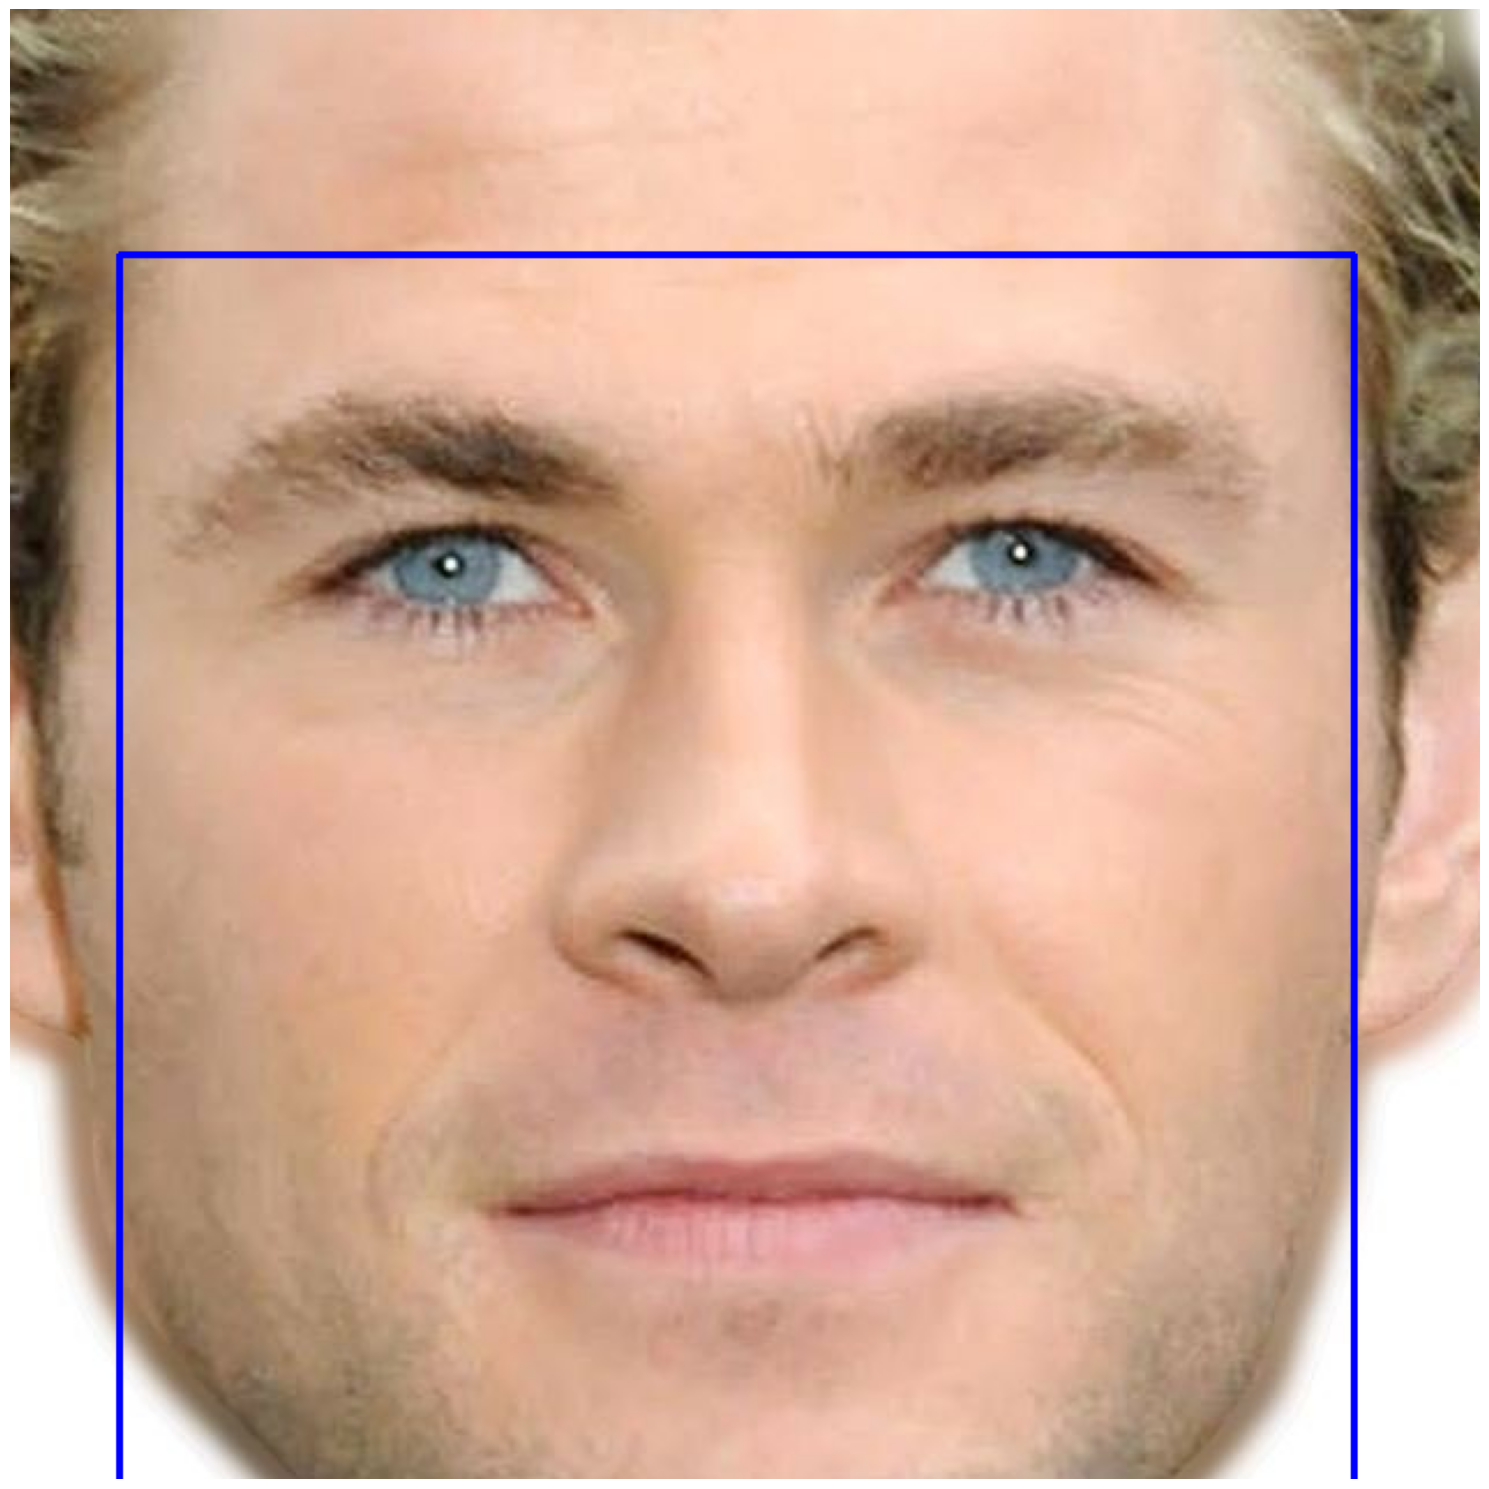

In [5]:
#Importovanje potrebnih biblioteka
import cv2
import dlib
import matplotlib.pylab as plt

#Učitavanje fotografije i njeno konvertovanje u RGB
pict = cv2.cvtColor(cv2.imread('cropped_images/chris_hemsworth/chris_hemsworth7.png'), cv2.COLOR_BGR2RGB)
#Vraća dlib-ov hog detektor lica
hog_det = dlib.get_frontal_face_detector()
faces = hog_det(pict, 0)

#Vraća broj detektovanih lica
print(len(faces))

#Prolazak kroz svako lice i crtanje pravougaonika oko njega (u ovom slučaju je samo jedno lice)
for face in faces:
    left,top,right,bottom = face.left(), face.top(), face.right(), face.bottom()
    #Crtanje pravoougaonika
    pict = cv2.rectangle(pict,(left,top),(right,bottom),(0,0,255),2)

#Prikaz rezultata fotografije
plt.figure(figsize=(15,20))
plt.imshow(pict), plt.axis('off')
plt.tight_layout()
plt.show()

## **Face recognition**

Ljudi svakodnevno automatski prepoznaju lica bez napora, dok se računarima taj zadatak čini složenim zbog mnogih promenljivih, kao što su varijacije osvetljenja, niska rezolucija, prepreke itd.

Prepoznavanje lica je osnovna sposobnost prepoznavanja osoba na temelju slika njihovih lica. U poslednjih nekoliko decenija, ova tehnologija postala je popularna zahvaljujući razvoju metoda i visokom kvalitetu kamera. Sistemi za prepoznavanje lica su tehnologije koje mogu uporediti ljudsko lice na digitalnoj slici ili video snimku s bazom podataka lica. Ovo se često koristi za autentifikaciju korisnika putem identifikacije, preciziranja karakteristika lica na slici itd.

Prednosti ove tehnologije uključuju mogućnost suzbijanja nelegalnih aktivnosti, dok nedostatak leži u zabrinutosti za privatnost. Sistemi za prepoznavanje lica variraju u svojoj sposobnosti da identifikuju ljude u teškim uslovima, kao što su loše osvetljenje i niska rezolucija.

Modeli kao što je dlib-ov najsavremeniji sistem za prepoznavanje lica, izgrađen na dubokom učenju, može postići tačnost od 99,38%. Generalno, sistemi za prepoznavanje lica prolaze kroz korake detekcije lica, analize lica, pretvaranja slike u podatke i traženja podudaranja.

Instalacija potrebne biblioteke za face recognition.

In [6]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=b5eeb4e8917b0b6cface45d434d17323d964930e11227d18a19bc4fc7281cb46
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


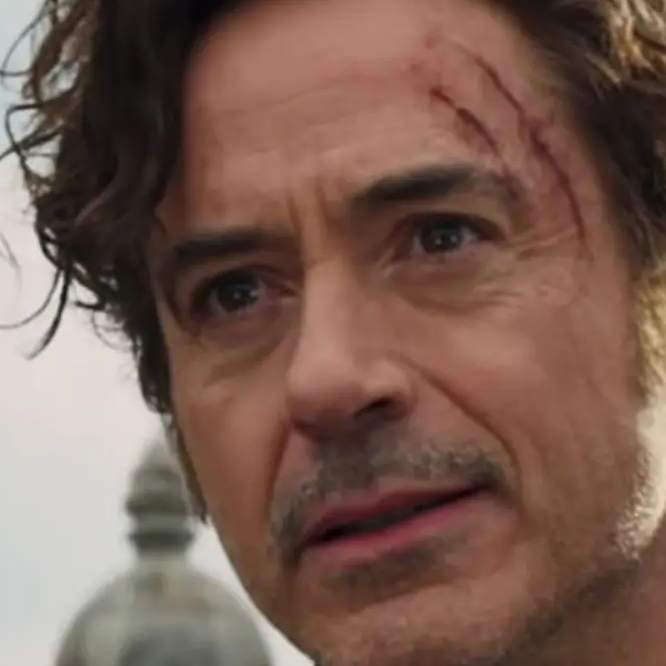

In [7]:
from PIL import Image, ImageDraw
from IPython.display import display

#Učitavanje i prikaz fotografije
pil_pic = Image.open('cropped_images/robert_downey_jr/robert_downey_jr16.png')
display(pil_pic)

In [8]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

#Primer prepoznavanja više lica na jednoj slici i iscrtavanje pravougaonika oko lica svake identifikovane osobe

#Učitavanje slike i učenje kako da prepozna osobu
robert_picture = face_recognition.load_image_file('cropped_images/robert_downey_jr/robert_downey_jr44.png')
robert_face_encoding = face_recognition.face_encodings(robert_picture) [0]

#Učitavanje slike druge osobe
scarlett_picture = face_recognition.load_image_file('cropped_images/scarlett_johansson/scarlett_johansson45.png')
scarlett_face_encoding = face_recognition.face_encodings(scarlett_picture) [0]

#Učitavanje slike treće osobe
chris_picture = face_recognition.load_image_file('cropped_images/chris_evans/chris_evans18.png')
chris_face_encoding = face_recognition.face_encodings(chris_picture) [0]

#Učitavanje slike četvrte osobe
chris_h_picture = face_recognition.load_image_file('cropped_images/chris_hemsworth/chris_hemsworth7.png')
chris_h_face_encoding = face_recognition.face_encodings(chris_h_picture) [0]

#Pravljenje niza poznatih lica i učenje njihovih imena
known_face_encodings = [
    robert_face_encoding,
    scarlett_face_encoding,
    chris_face_encoding,
    chris_h_face_encoding
]
known_face_names = [
    "Robert Downey",
    "Scarlett Johansson",
    "Chris Evans",
    "Chris Hemsworth"
]

#Prikay koliko lica je poynato
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 4 images.


In [9]:
#Kreiranje foldera i ubacivanje slike sa više lica
!mkdir known
!wget https://collider.com/wp-content/uploads/the-avengers-cast-slice.jpg -O known/avengers.jpg

--2024-01-22 12:57:14--  https://collider.com/wp-content/uploads/the-avengers-cast-slice.jpg
Resolving collider.com (collider.com)... 3.223.39.19
Connecting to collider.com (collider.com)|3.223.39.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23182 (23K) [image/jpeg]
Saving to: ‘known/avengers.jpg’

known/avengers.jpg  100%[===================>]  22.64K  --.-KB/s    in 0s      

2024-01-22 12:57:15 (254 MB/s) - ‘known/avengers.jpg’ saved [23182/23182]



<ipython-input-10-43e0679c82af>:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-10-43e0679c82af>:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-10-43e0679c82af>:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-10-43e0679c82af>:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_width, text_height = draw.textsize(name)
<ipython-input-10-43e0679c82af>:31: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead

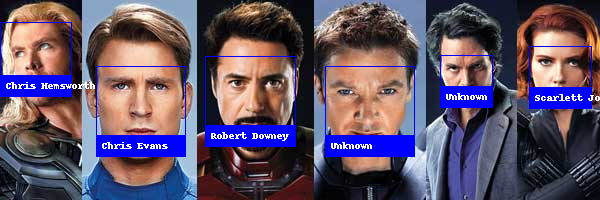

In [10]:
#Učitavanje slike sa nepoznatim licem
unknown_picture = face_recognition.load_image_file('known/avengers.jpg')

#Pronalaženje svih lica na slici
face_locations = face_recognition.face_locations(unknown_picture)
face_encodings = face_recognition.face_encodings(unknown_picture, face_locations)

#Slika se konvertuje u PIL-format da bi se uspešno iscrtavao pravougaonik na njoj uz pomoć Pillow biblioteke
pil_picture = Image.fromarray(unknown_picture)

#Pravljenje instance za uspešno crtanje
draw = ImageDraw.Draw(pil_picture)

#Izlistavanje svakog lica na nepoznatoj slici
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    #Provera podudaranja lica sa slike sa licima iz baze
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    #Ili umesto toga se koristi poznato lice sa najmanjom distancom od novog lica
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    #Iscrtavanje pravougaonika oko detektovanog lica
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    #Ispisiivanje imena ispod detektovanog lica
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


#Uklanjanje biblioteke crteža iz memorije
del draw

#Prikazivanje rezultata slike
display(pil_picture)

## **OpenCV**

OpenCV ( *Open Source Computer Vision Library* ) je biblioteka softvera za računarsku viziju i mašinsko učenje otvorenog koda. OpenCV je napravljen da obezbedi zajedničku infrastrukturu za aplikacije računarskog vida i da ubrza upotrebu mašinske percepcije u komercijalnim proizvodima. Budući da je proizvod sa BSD licencom, OpenCV olakšava preduzećima da koriste i modifikuju kod.

Biblioteka ima više od 2500 optimizovanih algoritama, što uključuje sveobuhvatan skup klasičnih i najsavremenijih algoritama kompjuterskog vida i mašinskog učenja. Ovi algoritmi se mogu koristiti za otkrivanje i prepoznavanje lica, identifikaciju objekata, klasifikovanje ljudskih radnji u video zapisima, praćenje kretanja kamere, praćenje objekata u pokretu, izdvajanje 3D modela objekata, proizvodnju 3D oblaka tačaka sa stereo kamera, spajanje slika kako bi se proizvela visoka rezolucija sliku cele scene, pronalazak slične slike iz baze podataka slika, uklanjanje crvenih očiju sa slika snimljenih korišćenjem blica, praćenje pokreta očiju, prepoznavanje pejzaža i postavljanje markera koji će ga prekriti proširenom stvarnošću, itd. OpenCV ima više od 47 hiljada ljudi korisnika zajednice i procenjeni broj preuzimanja veći od 18 miliona. Biblioteka se u velikoj meri koristi u preduzećima, istraživačkim grupama i od strane državnih organa.

OpenCV je originalno napisan u programskom jeziku C++ i sadrži šablonski interfejs koji se izvrsno slaže sa STL kontejnerima. Ova karakteristika donosi prednost jer će većina negativnih uzoraka slika biti brzo odbačena u ranim fazama algoritma. Drugim rečima, algoritam neće gubiti vreme na testiranje svih 6.000 karakteristika na svakoj slici. Kao rezultat toga, detekcija lica sada može da se obavi u stvarnom vremenu, umesto da traje satima.

## **Detekcija lica - HaarCascade**

Detekcija lica pomoću HaarCascade je pristup zasnovan na mašinskom učenju gde se kaskadna funkcija obučava sa skupom ulaznih podataka. OpenCV već sadrži mnogo unapred obučenih klasifikatora za lice, oči, osmehe, itd. U nastavku su korišćeni klasifikatori za lice, oči i osmeh. To je algoritam za detekciju objekata koji se koristi za identifikaciju lica na slici ili videu u realnom vremenu.

*   Detekcija radi samo sa nijansama sive i zato je potrebno pretvoriti sliku u sivu boju.
*   *detectMultiScale* funkcija se koristi za otkrivanje lica. Potrebna su joj 3 argumenta: ulazna slika, *scaleFactor* ( određuje koliko se veličina slike smanjuje sa svakom skalom ) i *minNeighbors* ( specificira koliko suseda svaki pravougaonik kandidata treba da ima da ga zadrži ).
*   *faces* - sadrži listu koordinata za pravougaone oblasti u kojima su lica pronađena. Koriste se ove koordinate da bi se nacrtali pravougaonici na slici.

Haar Cascade Detection je jedan od najstarijih, ali moćnih izumljenih algoritama za detekciju lica. Bio je tu dugo, mnogo pre nego što je duboko učenje postalo poznato. Haar karakteristike nisu korišćene samo za otkrivanje lica, već i za oči, usne, registarske tablice itd. Modeli se čuvaju na GitHub-u i može im se pristupiti pomoću OpenCV metoda.



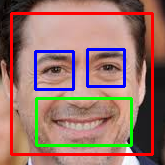

-1

In [11]:
#Importovanje potrebne biblioteke
import cv2
from google.colab.patches import cv2_imshow

#Učitavanje klasifikatora lica, oka i osmeha
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
eye_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_eye.xml'))
smile_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_smile.xml'))

#Učitavanje fotografije
img = cv2.imread('cropped_images/robert_downey_jr/robert_downey_jr36.png')

#Konvertovanje fotografije u crno-belu boju
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Detektovanje lica
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

#Prolazak kroz sva lica i crtanje pravougaonika
for (x, y, w, h) in faces:
    #Crtanje pravougaonika
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    #Detektovanje očiju i crtanje pravougaonika oko desnog i levod oka
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.04, 10)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)

    #Detektovanje osmeha i crtanje pravougaonika oko njega
    smile = smile_cascade.detectMultiScale(roi_gray, 1.38, 6)
    for (mx,my,mw,mh) in smile:
        cv2.rectangle(roi_color,(mx,my),(mx+mw,my+mh),(0,255,0),2)

#Prikaz rezultata fotografije
cv2_imshow(img)
cv2.waitKey()

## **Detekcija lica - MediaPipe**



MediaPipe Face Detection je izuzetno brzo rešenje za detekciju lica koje dolazi sa 6 referentnih tačaka i sposobnošću da prepozna više lica istovremeno. Ovo rešenje se bazira na *BlazeFace*-u, efikasnom detektoru lica visokih performansi koji je prilagođen za upotrebu na mobilnim grafičkim procesorima (GPU).

Ovaj detektor nudi izuzetno brze performanse u stvarnom vremenu, što ga čini idealnim za primene koje zahtevaju precizno prepoznavanje regiona lica kao ulaz za druge modele specifične za određene zadatke. Na primer, može se koristiti za 3D procenu ključnih tačaka lica (kao što je *MediaPipe Face Mesh*), klasifikaciju karakteristika ili izraza lica, kao i segmentaciju regiona lica.

*BlazeFace* koristi lagani model za ekstrakciju karakteristika inspirisan MobileNetV1/V2, prilagođenu šemu za GPU i poboljšanu strategiju za obradu rezolucije veza, koja predstavlja alternativu tradicionalnoj tehnici nepotpisivanja (non-maximal suppression).







Instaliranje potrebne biblioteke

In [12]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 19.6 MB/s eta 0:00:00


Nose tip:
x: 0.542794942855835
y: 0.6098014116287231



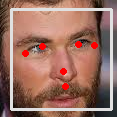

-1

In [13]:
import cv2
import mediapipe as mp

#Inicijalizacija MediaPipe modela za detekciju
mp_face_detection = mp.solutions.face_detection

#Korišćeni su MediaPipe alati za crtanje da bi se (lakše crtanje pravougaonika i tačaka na licu)
mp_drawing = mp.solutions.drawing_utils

#Dodeljivanje promenljive za sliku koja će se učitati
IMAGE_FILES = ['cropped_images/chris_hemsworth/chris_hemsworth21.png']
#Učitavanje modela detekcije lica gde se podešava model selection i prag pouzdanosti rezultata detekcije koji se podešava prema ulaznoj slici
with mp_face_detection.FaceDetection(
    model_selection=1, min_detection_confidence=0.5) as face_detection:

  #Prolazak kroz slike ako ih ima više, u ovom slučaju samo jedna, i njeno učitavanje
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    #Pretvara se slika u RGB i obrađuje se pomoću MediaPipe detekcije lica
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    #Crtanje svake detekcije na slici
    if not results.detections:
      continue
    annotated_image = image.copy()
    #Iterira se preko svake detekcija i iscrtava se na slici
    for detection in results.detections:
      print('Nose tip:')
      print(mp_face_detection.get_key_point(
          detection, mp_face_detection.FaceKeyPoint.NOSE_TIP))
      mp_drawing.draw_detection(annotated_image, detection)
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

#Prikaz rezultata fotografije
cv2_imshow(annotated_image)
cv2.waitKey()

## **Detekcija lica pomoću MTCNN-a**

MTCNN ( *MultiTask Cascaded Convolutional Neural Network* ) je moderan alat za detekciju lica, koji koristi detektor neuronske mreže u 3 faze. Prvo, veličina slike se menja više puta da bi se otkrila lica različitih veličina. Zatim P-mreža ( *Proposal* ) skenira slike, vršeći prvu detekciju. Ima nizak prag za detekciju i stoga otkriva mnogo lažnih pozitivnih rezultata, čak i nakon NMS ( nemaksimalne supresije ), ali namerno radi ovako.
Predloženi regioni (koji sadrže mnogo lažnih pozitivnih rezultata) ulazni su za drugu mrežu, R-mrežu ( *Refine* ), koja, kao što ime kaže, filtrira detekcije ( takođe sa NMS ) da bi se dobila prilično precizna granična polja.
U završnoj fazi, O-mreža ( Output ) vrši završno prečišćavanje graničnih okvira. Na ovaj način se ne detektuju samo lica, već su i granične kutije veoma ispravne i precizne. Opciona karakteristika MTCNN-a je otkrivanje orijentira na licu, tj. očiju, nosa i uglova usta. Gotovo je besplatno, jer se ionako koriste za detekciju lica u procesu, što je dodatna prednost ako su potrebni ( npr. za poravnavanje lica ). MTCNN je veoma precizan i robustan. Pravilno detektuje lica čak i sa različitim veličinama, osvetljenjem i jakim rotacijama. Malo je sporiji od detektora *Viola-Jones*, ali sa GPU-om ne mnogo. Takođe koristi informacije o boji, pošto CNN dobijaju RGB slike kao ulaz.

Instaliranje potrebne biblioteke

In [14]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.1 MB/s eta 0:00:00


In [15]:
#Importovanje potrebnih biblioteka
from mtcnn.mtcnn import MTCNN
import cv2
from google.colab.patches import cv2_imshow

#Učitavanje fotografije za obradu
picture = cv2.imread('cropped_images/scarlett_johansson/scarlett_johansson3.png')

#Učitavanje detektora i detektovanje lica
detector = MTCNN()
faces = detector.detect_faces(picture)

#Za izlaz se dobijaju koordinate okvira lica, desnog oka, levog oka, nosa, desne ivice usta i leve ivice usta
for face in faces:
  print(face)

1/1 [==============================] - 0s 261ms/step
{'box': [14, 0, 201, 251], 'confidence': 0.999427318572998, 'keypoints': {'left_eye': (74, 101), 'right_eye': (173, 100), 'nose': (129, 146), 'mouth_left': (87, 199), 'mouth_right': (164, 198)}}


1/1 [==============================] - 0s 17ms/step


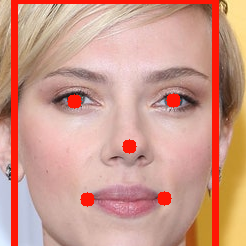

In [16]:
#Kreiranje okvira koji ce na slici biti prikazan kao pravougaonik
def create_box(picture):
  #Detektovanje lica na slici
  faces = detector.detect_faces(picture)
  bounding_box = faces[0]['box']
  keypoints = faces[0]['keypoints']

  #Crtanje pravougaonika (cv2.rectangle(fotografija, start_point, end_point, boja, debljina))
  cv2.rectangle(picture,
                (bounding_box[0], bounding_box[1]),
                (bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),
                (5, 22, 255),
                5)

  #Kreiranje tacki koje ce oznacavati levo i desno oko, nos i levu i desnu ivicu usta
  cv2.circle(picture,(keypoints['left_eye']), 2, (5, 22, 255), 10)
  cv2.circle(picture,(keypoints['right_eye']), 2, (5, 22, 255), 10)
  cv2.circle(picture,(keypoints['nose']), 2, (5, 22, 255), 10)
  cv2.circle(picture,(keypoints['mouth_left']), 2, (5, 22, 255), 10)
  cv2.circle(picture,(keypoints['mouth_right']), 2, (5, 22, 255), 10)

  return picture

#Hvatanje slike iz fukcije za ivičenje i njen prikaz
marked_image = create_box(picture)
cv2_imshow(marked_image)

1/1 [==============================] - 0s 17ms/step


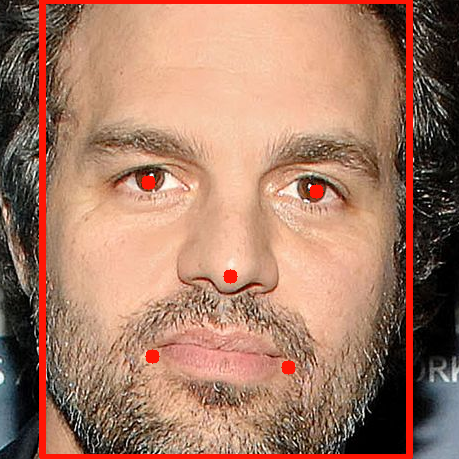

In [17]:
#Prikaz još jedne slike
marked_image = create_box(cv2.imread('cropped_images/mark_ruffalo/mark_ruffalo41.png'))
cv2_imshow(marked_image)

1/1 [==============================] - 0s 17ms/step


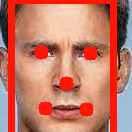

In [18]:
marked_image = create_box(cv2.imread('cropped_images/chris_evans/chris_evans6.png'))
cv2_imshow(marked_image)

## **Zaključak**

Ovaj rad istražuje primenu tehnika mašinskog učenja i dubokog učenja u detekciji lica na digitalnim slikama. Detekcija lica je ključna tehnologija u oblasti veštačke inteligencije sa mnogim praktičnim primenama, uključujući bezbednost, biometriju, sprovođenje zakona i zabavu.

U prvom delu rada razmotrena je detekcija lica pomoću HOG karakteristika i SVM algoritma. HOG karakteristike su se pokazale kao moćan deskriptor za prepoznavanje oblika objekata, uključujući lica. Međutim, ovaj pristup ima svoja ograničenja, posebno u vezi sa detekcijom lica koja nisu frontalna i ravna.

U drugom delu rada istražene su različite tehnike detekcije lica, uključujući HaarCascade, MediaPipe i MTCNN biblioteke. HaarCascade koristi predefinisane klasifikatore za detekciju lica, očiju i osmeha i može se koristiti za brzu detekciju u realnom vremenu. MediaPipe Face Detection je efikasan detektor lica sa visokim performansama i sposobnošću prepoznavanja više lica istovremeno. MTCNN je moderna mreža za detekciju lica koja pruža visoku preciznost i robustnost u različitim uslovima.

Svaka od ovih tehnika ima svoje prednosti i mane, i izbor detektora zavisiće od specifičnih zahteva aplikacije. Duboko učenje i mašinsko učenje omogućavaju kontinuirani napredak u oblasti detekcije lica i obećavaju nove i naprednije metode u budućnosti.

Detekcija lica je ključna tehnologija u oblasti veštačke inteligencije sa mnogim praktičnim primenama, uključujući bezbednost, biometriju, sprovođenje zakona i zabavu. Ovaj rad je istražio različite tehnike i alatke za detekciju lica, istražujući njihove prednosti i ograničenja. Važno je napomenuti da se detekcija lica razvija i dalje, a buduće tehnologije mogu doneti još bolje rezultate i veću preciznost.

## **Literatura**

[1] https://www.techtarget.com/searchenterpriseai/definition/face-detection

[2] https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

[3] https://opencv.org/about/

[4] https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81

[5] https://google.github.io/mediapipe/solutions/face_detection.html

[6] https://medium.com/sciforce/face-detection-explained-state-of-the-art-methods-and-best-tools-f730fca16294

[7]https://towardsdatascience.com/robust-face-detection-with-mtcnn-400fa81adc2e